In [15]:
import numpy as np

import matplotlib.pyplot as plt 

from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist, cifar10

In [16]:
(train, _), (test, _) = mnist.load_data()

# scaling input data
train = train.reshape([-1,28,28,1]) / 255
test = test.reshape([-1,28,28,1]) / 25

In [17]:
# Adding noise to data
noise = 0.3
train_noise = train + noise * np.random.normal(0, 1, size=train.shape)
test_noise = test + noise * np.random.normal(0, 1, size=test.shape)

train_noise = np.clip(train_noise, 0, 1)
test_noise = np.clip(test_noise, 0, 1)

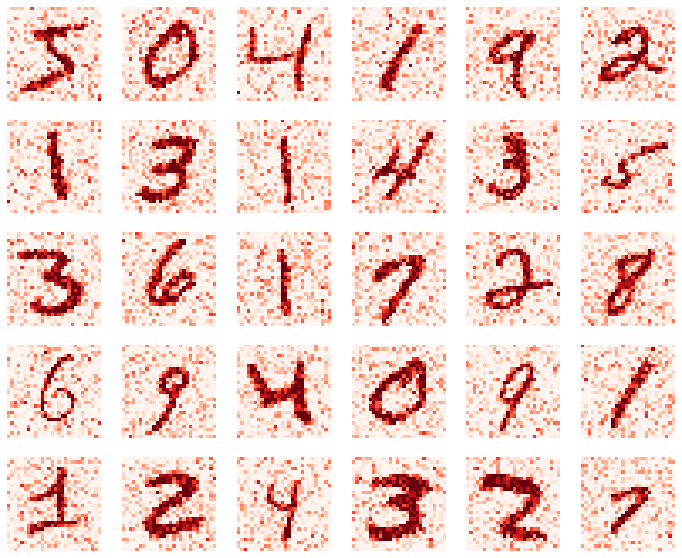

In [18]:
# sample noisy image

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2

f = plt.figure(figsize=(subplot_size*cols,subplot_size*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_noise[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_noise.png")

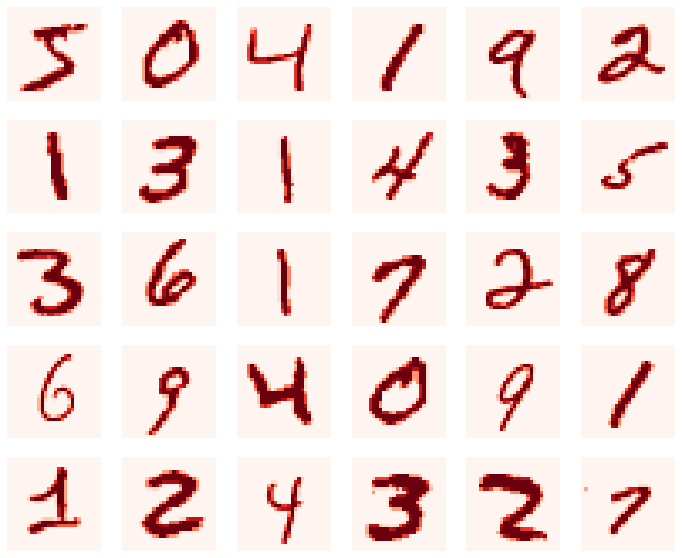

In [19]:
# sample original image

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_original.png")

In [20]:
# Encoder 
inputs = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPool2D()(x)

In [21]:
# Decoder

x = Conv2D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [22]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          9248

In [34]:
epochs = 10
batch_size = 256

history = autoencoder.fit(train_noise,
                train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_noise, test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0804 - val_loss: -4.9542
Epoch 2/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0804 - val_loss: -4.5096
Epoch 3/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0803 - val_loss: -5.1151
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0803 - val_loss: -4.6932
Epoch 5/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0803 - val_loss: -4.1891
Epoch 6/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0803 - val_loss: -5.1298
Epoch 7/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0803 - val_loss: -4.5539
Epoch 8/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0802 - val_loss: -5.2681
Epoch 9/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0802 - val_l

In [35]:
autoencoder.evaluate(test_noise,test)

10000/10000 [==============================] - 7s 666us/step


-4.9678666831970215

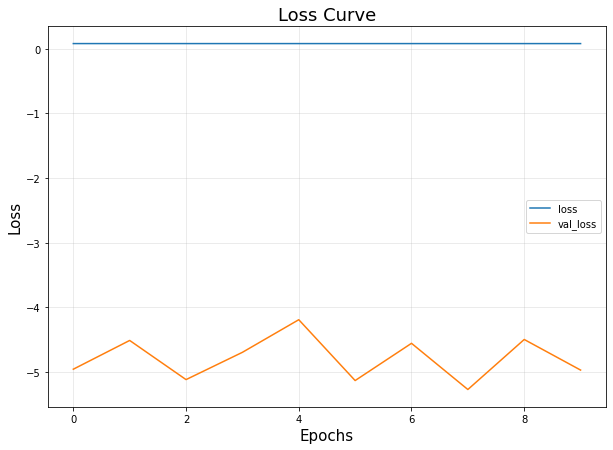

In [36]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()



In [37]:
# Select few random test images
num_imgs = 16
rand = np.random.randint(1, 100)

test_images = test_noise[rand:rand+num_imgs] # slicing
test_desoided = autoencoder.predict(test_images) # predict

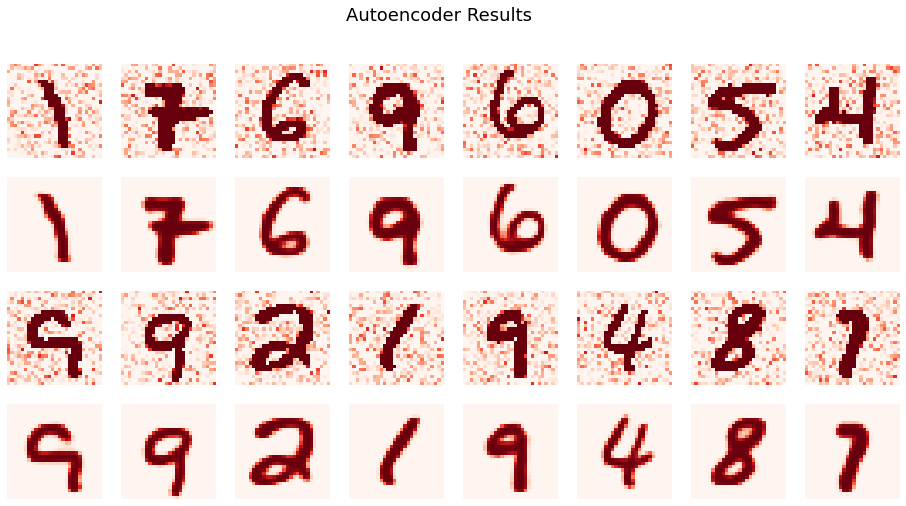

In [38]:
# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_images[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_desoided[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")

plt.show()